In [1]:
import requests
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

In [3]:
url="http://books.toscrape.com"

In [4]:
response=requests.get(url)

In [5]:
soup=BeautifulSoup(response.text,'html.parser')

In [6]:
books=soup.find_all('article',class_='product_pod')

In [14]:
book_data = []
conversion_rate = 104  # 1 GBP ≈ 104 INR (update if needed)

for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text  # e.g., "£51.77"
    
    # Clean the price string
    price_gbp_cleaned = price.replace('£', '').replace('Â', '').strip()
    
    try:
        # Convert to float
        price_gbp_value = float(price_gbp_cleaned) if price_gbp_cleaned else 0.0
        
        # Convert to INR
        price_inr = price_gbp_value * conversion_rate
        
        # Print info
        print(f"Title: {title}\nPrice (GBP): £{price_gbp_value:.2f}\nPrice (INR): ₹{price_inr:.2f}\n")
        
        # Append to list
        book_data.append({
            "Title": title,
            "Price (GBP)": f"£{price_gbp_value:.2f}",
            "Price (INR)": f"₹{price_inr:.2f}"
        })
    except ValueError:
        print(f"Error converting price for '{title}': {price}")

Title: A Light in the Attic
Price (GBP): £51.77
Price (INR): ₹5384.08

Title: Tipping the Velvet
Price (GBP): £53.74
Price (INR): ₹5588.96

Title: Soumission
Price (GBP): £50.10
Price (INR): ₹5210.40

Title: Sharp Objects
Price (GBP): £47.82
Price (INR): ₹4973.28

Title: Sapiens: A Brief History of Humankind
Price (GBP): £54.23
Price (INR): ₹5639.92

Title: The Requiem Red
Price (GBP): £22.65
Price (INR): ₹2355.60

Title: The Dirty Little Secrets of Getting Your Dream Job
Price (GBP): £33.34
Price (INR): ₹3467.36

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price (GBP): £17.93
Price (INR): ₹1864.72

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price (GBP): £22.60
Price (INR): ₹2350.40

Title: The Black Maria
Price (GBP): £52.15
Price (INR): ₹5423.60

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price (GBP): £13.99
Price (INR): ₹1454.96

Title: Shakespeare's Sonnets
Price

In [15]:
book1=df.iloc[2]

In [16]:
book1

Title    Soumission
Price       Â£50.10
Name: 2, dtype: object

In [17]:
top=df.head(6)
top

,Title,Price
0,A Light in the Attic,Â£51.77
1,Tipping the Velvet,Â£53.74
2,Soumission,Â£50.10
3,Sharp Objects,Â£47.82
4,Sapiens: A Brief History of Humankind,Â£54.23
5,The Requiem Red,Â£22.65


In [18]:
total=df.groupby("Title")["Price"].sum().sort_values(ascending=False)
total

Title
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991                Â£57.25
Sapiens: A Brief History of Humankind                                                             Â£54.23
Tipping the Velvet                                                                                Â£53.74
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)                                           Â£52.29
The Black Maria                                                                                   Â£52.15
A Light in the Attic                                                                              Â£51.77
Libertarianism for Beginners                                                                      Â£51.33
Soumission                                                                                        Â£50.10
Sharp Objects                                                                                     Â£47.82
It's Only the Himalayas                 

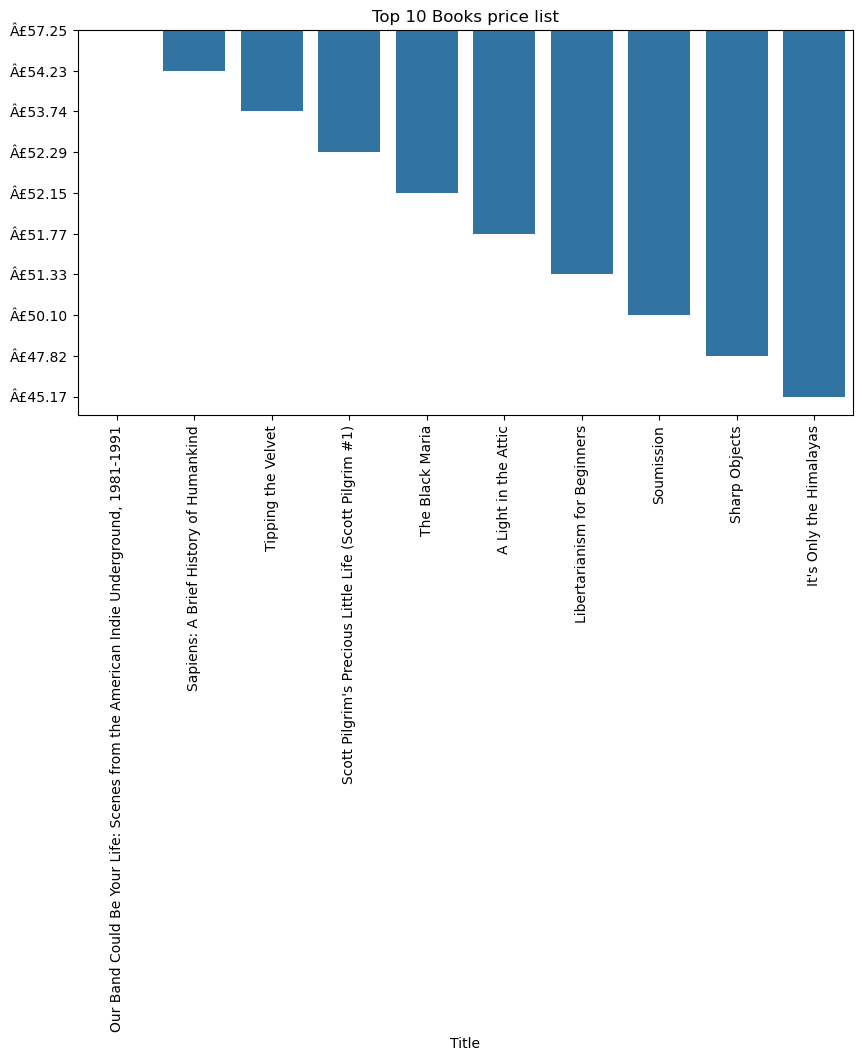

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#Bar chart of top books with highest price
top10=total.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=90)
plt.title("Top 10 Books price list")
plt.show()